# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

In [4]:
# np.argmax()
a = np.array([[1,2,3],[3,1,2]])
a

array([[1, 2, 3],
       [3, 1, 2]])

In [5]:
np.argmax(a, axis = 0) # 행방향에서 누가 제일 크냐(1행:3, 2행:2, 3행:3 1행에서 3은 2열이니까 1, 나머지는 1열이라서 0 (index는 0부터 시작))

array([1, 0, 0])

In [6]:
np.argmax(a, axis = 1)

array([2, 0])

In [7]:
np.argmax(a)

np.int64(2)

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [8]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [9]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [10]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

### (1) 모델 설계

In [14]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [15]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 3, activation = 'softmax')] ) # 출력층 노드:3, 활성화 함수: softmax

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [16]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 1.2198 - val_loss: 1.0111
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1.0245 - val_loss: 0.9379
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.9469 - val_loss: 0.8106
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 0.8500 - val_loss: 0.6748
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.7180 - val_loss: 0.5874
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.6611 - val_loss: 0.5330
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.5998 - val_loss: 0.4790
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.5426 - val_loss: 0.4411
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 0.5078 - val_loss: 0.4192
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.5137 - val_loss: 0.3944
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4665 - val_loss: 0.3761
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4431 - val_lo

* 학습결과 그래프

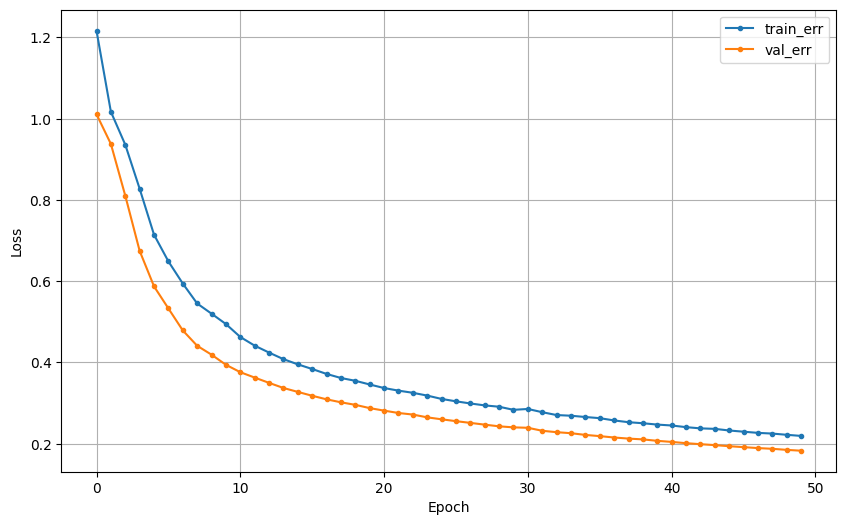

In [17]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [18]:
pred = model.predict(x_val)
pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[9.7096914e-01, 2.8812522e-02, 2.1832682e-04],
       [1.5510178e-02, 7.8072417e-01, 2.0376578e-01],
       [1.8194778e-02, 6.9407779e-01, 2.8772730e-01],
       [7.9469697e-04, 3.5362229e-01, 6.4558309e-01],
       [3.9929893e-02, 8.6320591e-01, 9.6864194e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [19]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [20]:
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2])

:* 실제값 y_val은 0,1,2 로 된 1차원 값입니다. (정수 인코딩 해놔서)

In [21]:
y_val

,Species
47,0
73,1
74,1
129,2
67,1
89,1
143,2
21,0
108,2
12,0


In [22]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 16  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.89      0.84        18
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



----

## 4.모델링2 : 은닉층

### (1) 모델

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [23]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(8, activation = 'relu'),
                    Dense(3 , activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [24]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 1.2182 - val_loss: 1.1837
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1390 - val_loss: 1.1180
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0778 - val_loss: 1.0612
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0438 - val_loss: 1.0094
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0053 - val_loss: 0.9600
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9706 - val_loss: 0.9141
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9402 - val_loss: 0.8689
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8766 - val_loss: 0.8265
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8507 - val_loss: 0.7837
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8100 - val_loss: 0.7421
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7809 - val_loss: 0.7011
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7417 - val_loss: 0.6606
E

* 학습결과 그래프

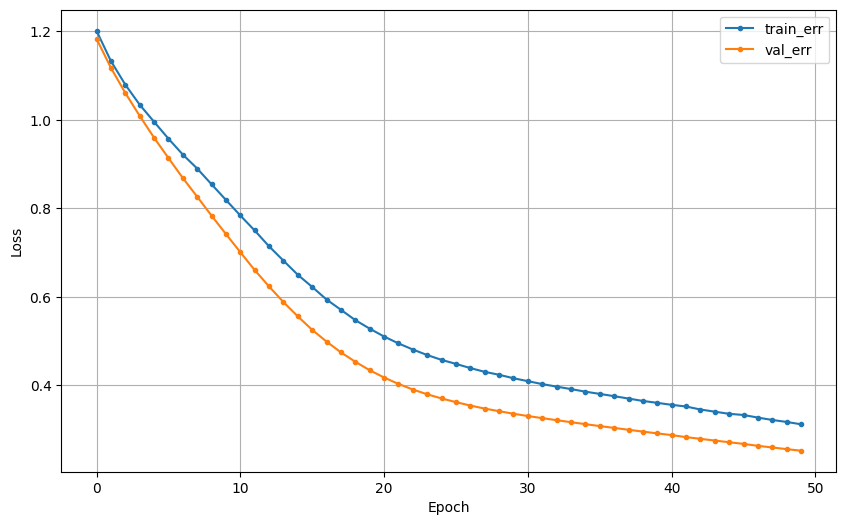

In [25]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [26]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [27]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 10  8]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.56      0.67        18
           2       0.60      0.86      0.71        14

    accuracy                           0.78        45
   macro avg       0.81      0.80      0.79        45
weighted avg       0.81      0.78      0.78        45



## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [28]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [29]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [30]:
y_c = to_categorical(y.values, 3)

In [31]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### (2) 데이터 분할2 : train : val

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [33]:
y_train.shape

(105, 3)

### (3) Scaling

In [34]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [35]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [36]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(3, activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [37]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.1293 - val_loss: 1.0276
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9532 - val_loss: 0.9581
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8628 - val_loss: 0.8027
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7333 - val_loss: 0.6926
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6747 - val_loss: 0.6181
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6171 - val_loss: 0.5597
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5679 - val_loss: 0.5236
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5504 - val_loss: 0.4987
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5138 - val_loss: 0.4711
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4849 - val_loss: 0.4438
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4642 - val_loss: 0.4267
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4431 - val_l

* 학습결과 그래프

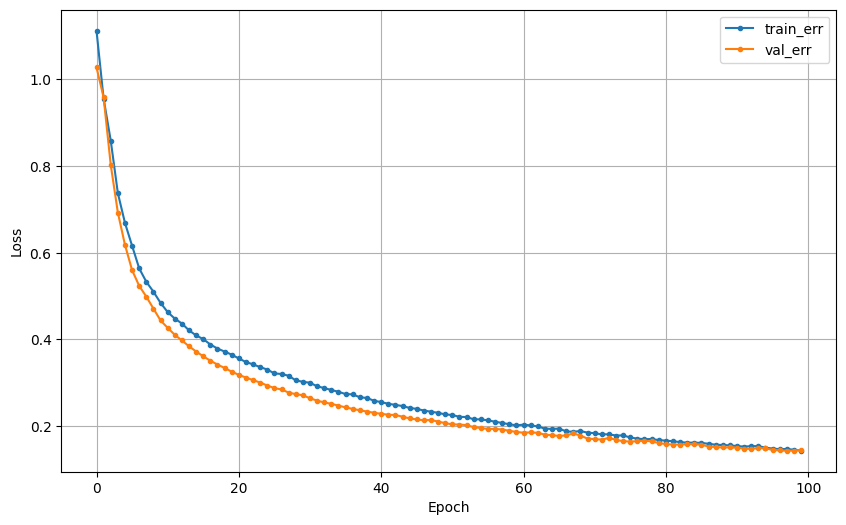

In [38]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [39]:
pred = model.predict(x_val)
pred[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[2.0461141e-05, 6.1518643e-02, 9.3846089e-01],
       [1.5932980e-06, 8.0893628e-02, 9.1910481e-01],
       [9.6281415e-01, 3.7184417e-02, 1.3873423e-06],
       [6.0171395e-04, 3.8630408e-01, 6.1309421e-01],
       [9.8416048e-01, 1.5839119e-02, 3.0644927e-07]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [40]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [41]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [42]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [43]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [44]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [45]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.93      0.88        15
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

